In [3]:
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt
import cv2
from matplotlib.patches import Patch


In [4]:
# Load the images of interest:
spring_label = '005_11_16_20180419_label2023-05-30-10-32_Michael.png'
spring_image = '005_11_16_20180419.jpg'
autumn_label = '005_11_16_20180917_label2023-05-25-10-18_Michael.png'
autumn_image = '005_11_16_20180917.jpg'

**Open test image to get pixel values of each distinct classification:**

In [10]:
from PIL import Image
a = Image.open('test.png')
# These are the colours present in the image:
colours = a.getcolors()
w_dunes = colours[0][1]
g_dunes = colours[1][1]
other = colours[2][1]
sand = colours[3][1]
shrub = colours[4][1]

labels = {'White dunes':w_dunes,
          'Grey dunes':g_dunes,
            #'Other':other, # Don't really need this for visualization. Just there for completeness sake.
            'Sand':sand,
            'Shrub':shrub}

# Extract image information
a.getbands

<bound method Image.getbands of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x1054B8E20>>

In [11]:
# Create upper and lower bounds of colours for creating mask:
def upper_lower(colour):
    colour_upper = []
    colour_lower = []
    
    for col in colour:
        if col >= 250:
            colour_upper.append(255)
            colour_lower.append(col - 5)
        elif col <=5:
            colour_upper.append(col + 5)
            colour_lower.append(0)
        else:
            colour_upper.append(col + 5)
            colour_lower.append(col - 5)
    return np.array(colour_upper), np.array(colour_lower) #output needs to be in np array format.


In [12]:
# Read in the RGB annotation signature of habitat type, annotated image object (cv2) and original image (cv2)
def mask_img(habitat, ann, orig):
    # Get the upper and lower bounds of white dunes:
    habitat_u, habitat_l = upper_lower(habitat)

    # Conversion to RGB colour format:
    ann_rgb = cv2.cvtColor(ann, cv2.COLOR_BGR2RGB)

    # Creation of mask:
    mask = cv2.inRange(ann_rgb,habitat_l,habitat_u)

    return mask

In [17]:
# Plots the histogram of each masked part of image.

def plot_hists(season,img, label, masks, names):
    # First deal with the images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(3,2)
    
    # Plotting the images:
    ax[0,0].imshow(img)
    ax[0,0].set_title('Image Tile')
    ax[0,0].set_xticks([])
    ax[0,0].set_yticks([])
    
    ax[0,1].imshow(label)
    ax[0,1].set_title('Image Label')
    ax[0,1].set_xticks([])
    ax[0,1].set_yticks([])

    legend_elements = [Patch(facecolor='orange',label='White dunes'),
                   Patch(facecolor='red',label='Grey dunes'),
                   Patch(facecolor='blue',label='Sand'),
                   Patch(facecolor='green',label='Shrub')]

    ax[0,1].legend(handles=legend_elements, 
                   loc='center left', 
                   fontsize='x-small',
                   framealpha = 0.3)
    
    # Create rows and columns for formatting
    rows = [1,1,2,2]
    cols = [0,1,0,1]

    colours = ('r','g','b')
    plt.title(season)
    for a,mask in enumerate(masks):    
        for i,colour in enumerate(colours):
            hist = cv2.calcHist([img],[i],mask,[256],[0,256])
            ax[rows[a],cols[a]].plot(hist/hist.max(),color = colour)
        ax[rows[a],cols[a]].set_title(f'{names[a]}')
    fig.set_figheight(8)
    fig.set_figwidth(6)

    fig.suptitle(season)

    # Set axes having shared xticks and/or yticks to be empty.
    ax[1,0].set_xticks([])
    ax[1,1].set_xticks([])
    ax[1,1].set_yticks([])
    ax[2,1].set_yticks([])
    
    #cbar_ax = fig.add_axes([0.85, 0.11, 0.03, 0.767]) #left, bottom, width, height as % of total figure.
    #fig.colorbar(np.linspace(0,1),cax=cbar_ax)
    #plt.subplots_adjust(wspace=0.3,
    #                hspace=0.3)   
    fig.tight_layout(rect=[0, 0, 0.8, 1])

    return fig

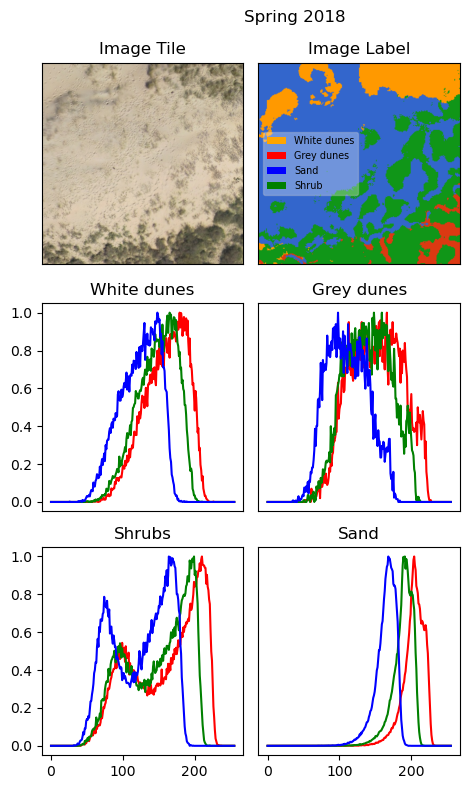

In [18]:
# Create visualization for Spring
orig_spring = cv2.imread(spring_image)
label_spring = cv2.imread(spring_label)

names = ['White dunes', 'Grey dunes', 'Shrubs', 'Sand']
colours = [w_dunes,g_dunes,shrub,sand]
masked = []

for col in colours:
    masked.append(mask_img(col,label_spring,orig_spring))

spring = plot_hists('Spring 2018',orig_spring,label_spring,masked,names)
spring.savefig('spring.png')

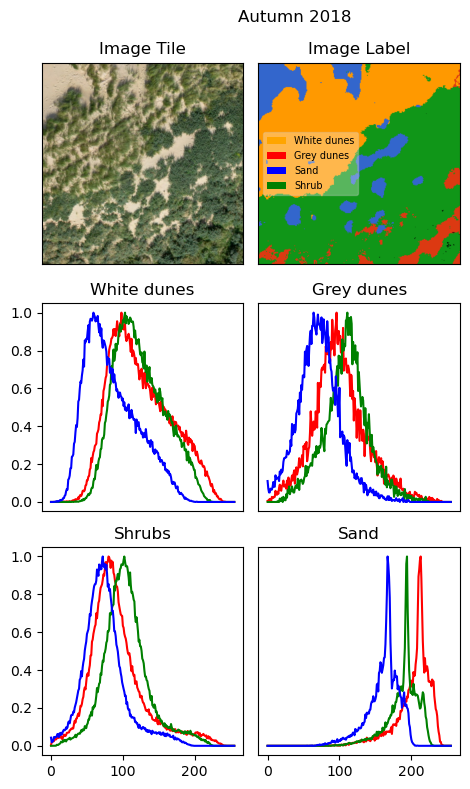

In [20]:
# Create visualization for autumn.
orig_autumn = cv2.imread(autumn_image)
label_autumn = cv2.imread(autumn_label)

masked = []

for col in colours:
    masked.append(mask_img(col,label_autumn,orig_autumn))

autumn = plot_hists('Autumn 2018',orig_autumn,label_autumn,masked,names)
autumn.savefig('autumn.png')

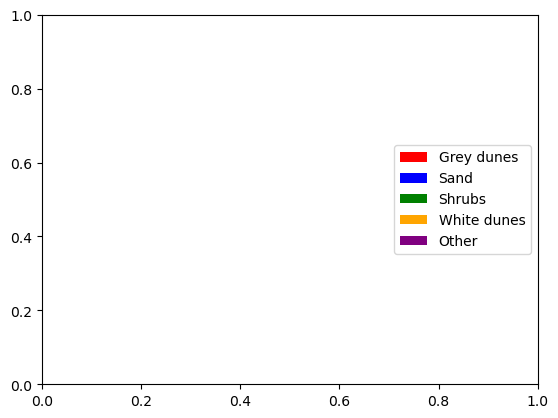

In [23]:
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='red',label='Grey dunes'),
                    Patch(facecolor='blue',label='Sand'),
                   Patch(facecolor='green',label='Shrubs'),
                  Patch(facecolor='orange',label='White dunes'),
                    Patch(facecolor = 'purple', label = 'Other')]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='right')

plt.show()